# Ejercicios de Análisis de Datos de Ventas

En este notebook se proponen 10 ejercicios diferentes utilizando un dataset de ventas. Cada ejercicio requiere aplicar operaciones de agrupación (*groupby*), conteo de valores (*value_counts*), cálculos de medias, y generar visualizaciones para responder preguntas específicas.

El dataset de ejemplo tiene la siguiente estructura:

| InvoiceNo | StockCode | Description                                    | Quantity | InvoiceDate        | UnitPrice | CustomerID | Country        |
|-----------|-----------|------------------------------------------------|----------|--------------------|-----------|------------|----------------|
| 536365    | 85123A    | WHITE HANGING HEART T-LIGHT HOLDER             | 6        | 12/1/2010 8:26     | 2.55      | 17850.0    | United Kingdom |
| 536365    | 71053     | WHITE METAL LANTERN                            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84406B    | CREAM CUPID HEARTS COAT HANGER                 | 8        | 12/1/2010 8:26     | 2.75      | 17850.0    | United Kingdom |
| 536365    | 84029G    | KNITTED UNION FLAG HOT WATER BOTTLE            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |

Puedes ampliar el dataset según sea necesario para los ejercicios.

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
!unzip customer_segmentation.csv.zip

--2025-09-25 00:35:41--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip [following]
--2025-09-25 00:35:42--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7548720 (7.2M) [application/zip]
Saving to: ‘customer_segmentation.csv.zip.3’

custom

## Preparación del Dataset

Primero, importamos las librerías necesarias, creamos el DataFrame de ejemplo y realizamos las conversiones correspondientes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

try:
    data = pd.read_csv('customer_segmentation.csv', encoding="latin-1")
except FileNotFoundError:
    print("El archivo no se encontró. Asegúrate de que 'customer_segmentation.csv' esté en el directorio correcto.")
    exit()

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

data.dropna(subset=['CustomerID'], inplace=True)

data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

print("Dataset preparado y listo para el análisis.")

Dataset preparado y listo para el análisis.


In [3]:

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## Ejercicio 1: Exploración del Dataset

Realiza una exploración básica del dataset: muestra las primeras filas, la información general (con `.info()`) y verifica si hay datos nulos.

In [4]:

print("Primeras filas del DataFrame:")
print(data.head())
print("\nInformación general del DataFrame:")
data.info()
print("\nConteo de datos nulos por columna:")
print(data.isnull().sum())

Primeras filas del DataFrame:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 397884

## Ejercicio 2: Agrupación por País

Agrupa los datos por la columna `Country` para:
- Calcular el total de `Quantity` vendido por país.
- Calcular la media de `UnitPrice` por país.

Visualiza el total de `Quantity` por país utilizando un gráfico de barras. Dame los 5 primeros

Análisis de Cantidad y Precio por País (Top 5):
                TotalQuantity  MeanUnitPrice
Country                                     
United Kingdom        4256740       2.963994
Netherlands            200361       2.648465
EIRE                   140275       4.447109
Germany                119261       3.709308
France                 111471       4.415782


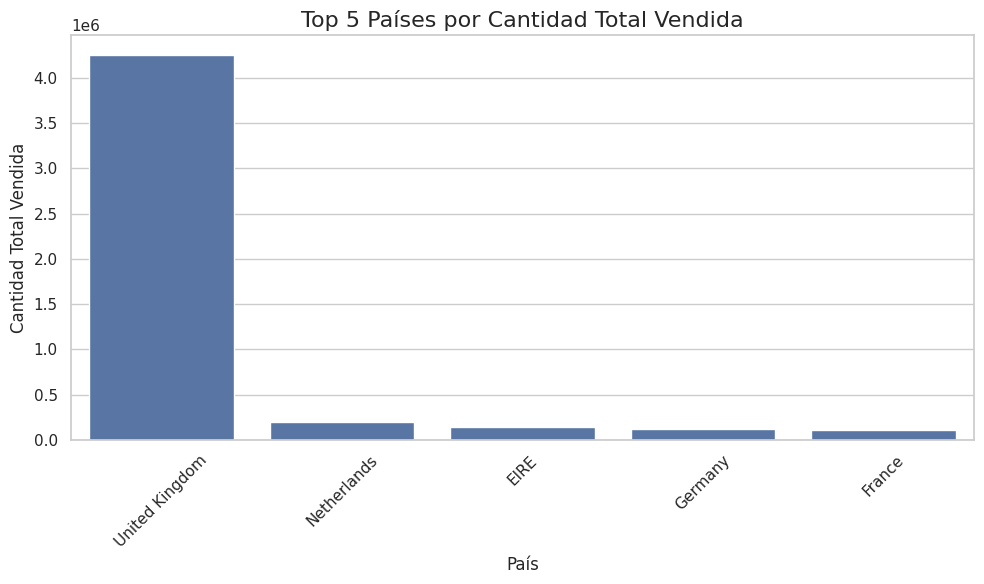

In [5]:

country_analysis = data.groupby('Country').agg(
    TotalQuantity=('Quantity', 'sum'),
    MeanUnitPrice=('UnitPrice', 'mean')
).sort_values(by='TotalQuantity', ascending=False)
print("Análisis de Cantidad y Precio por País (Top 5):")
print(country_analysis.head())
plt.figure(figsize=(10, 6))
sns.barplot(x=country_analysis.head(5).index, y=country_analysis.head(5)['TotalQuantity'])
plt.title('Top 5 Países por Cantidad Total Vendida', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Cantidad Total Vendida', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Ejercicio 3: Frecuencia de StockCode

Agrupa el DataFrame por `StockCode` y cuenta la frecuencia de cada producto. Utiliza `value_counts` para verificar el resultado.

Visualiza los StockCode más frecuentes con un gráfico de barras horizontal. Dame los 10 primeros

Top 10 StockCodes más frecuentes:
StockCode
85123A    2035
22423     1723
85099B    1618
84879     1408
47566     1396
20725     1317
22720     1159
20727     1105
POST      1099
23203     1098
Name: count, dtype: int64


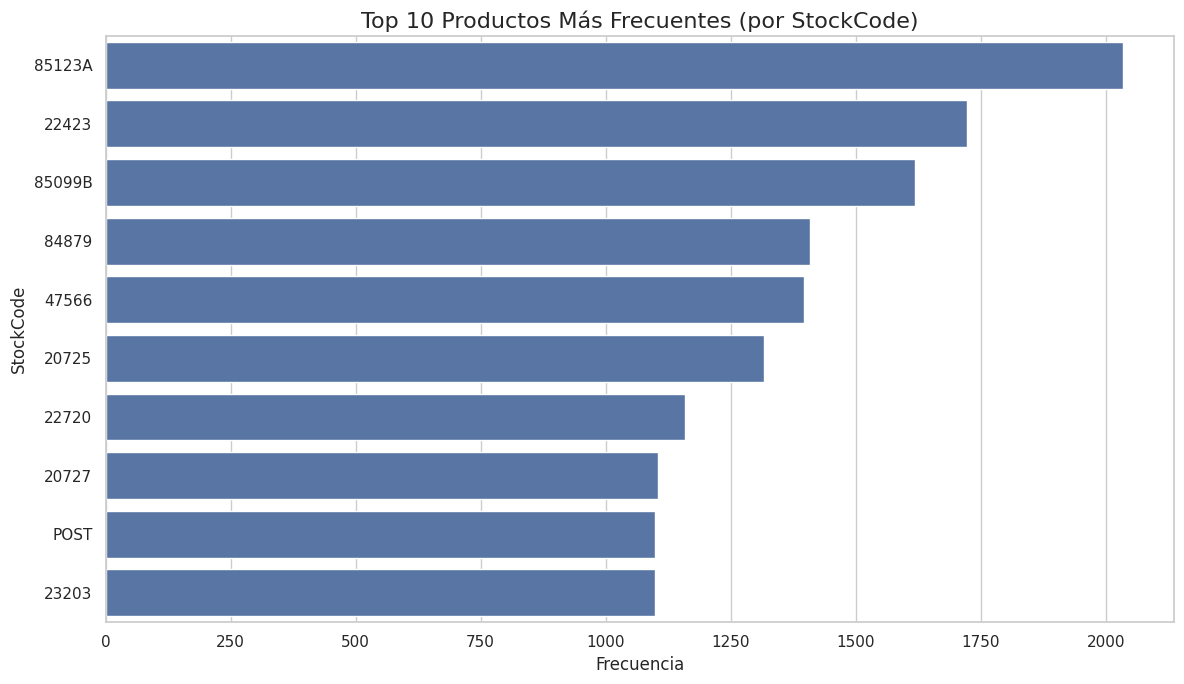

In [6]:

stock_code_frequency = data['StockCode'].value_counts().head(10)
print("Top 10 StockCodes más frecuentes:")
print(stock_code_frequency)
plt.figure(figsize=(12, 7))
sns.barplot(y=stock_code_frequency.index, x=stock_code_frequency.values, orient='h')
plt.title('Top 10 Productos Más Frecuentes (por StockCode)', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('StockCode', fontsize=12)
plt.tight_layout()
plt.show()

## Ejercicio 4: Ventas Totales por Factura

1. Crea una nueva columna llamada `TotalPrice` que sea el producto de `Quantity` y `UnitPrice`.
2. Agrupa los datos por `InvoiceNo` y calcula la suma de `TotalPrice` para cada factura.
3. Calcula la factura promedio (media) del total de ventas por factura.

Visualiza la distribución de los totales de factura con un histograma.

La media del total de ventas por factura es: $480.87


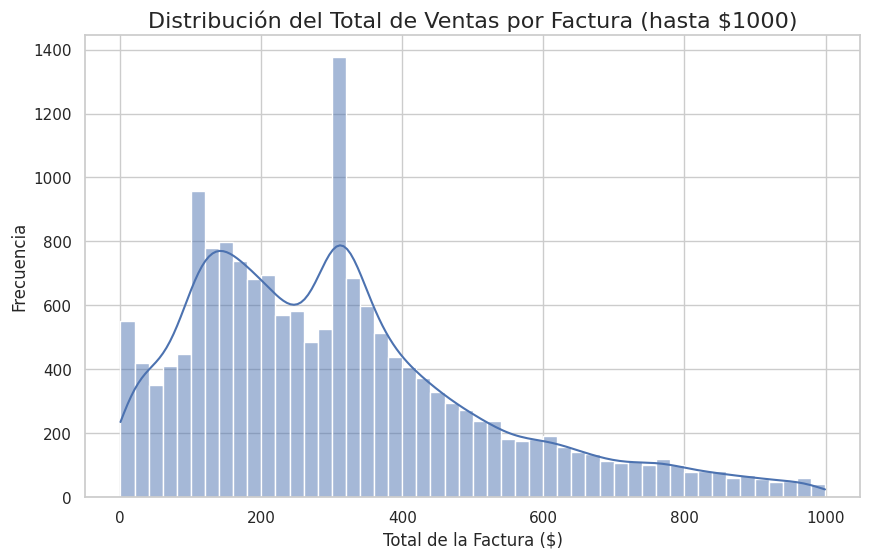

In [7]:

invoice_totals = data.groupby('InvoiceNo')['TotalPrice'].sum()

average_invoice_total = invoice_totals.mean()

print(f"La media del total de ventas por factura es: ${average_invoice_total:.2f}")

plt.figure(figsize=(10, 6))
sns.histplot(invoice_totals[invoice_totals < 1000], bins=50, kde=True)
plt.title('Distribución del Total de Ventas por Factura (hasta $1000)', fontsize=16)
plt.xlabel('Total de la Factura ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()


## Ejercicio 5: Evolución Temporal de Ventas

Utiliza la columna `InvoiceDate` para visualizar cómo evoluciona el valor de `TotalPrice` a lo largo del tiempo.

Realiza un gráfico de líneas donde el eje x sea la fecha y el eje y sea `TotalPrice`.

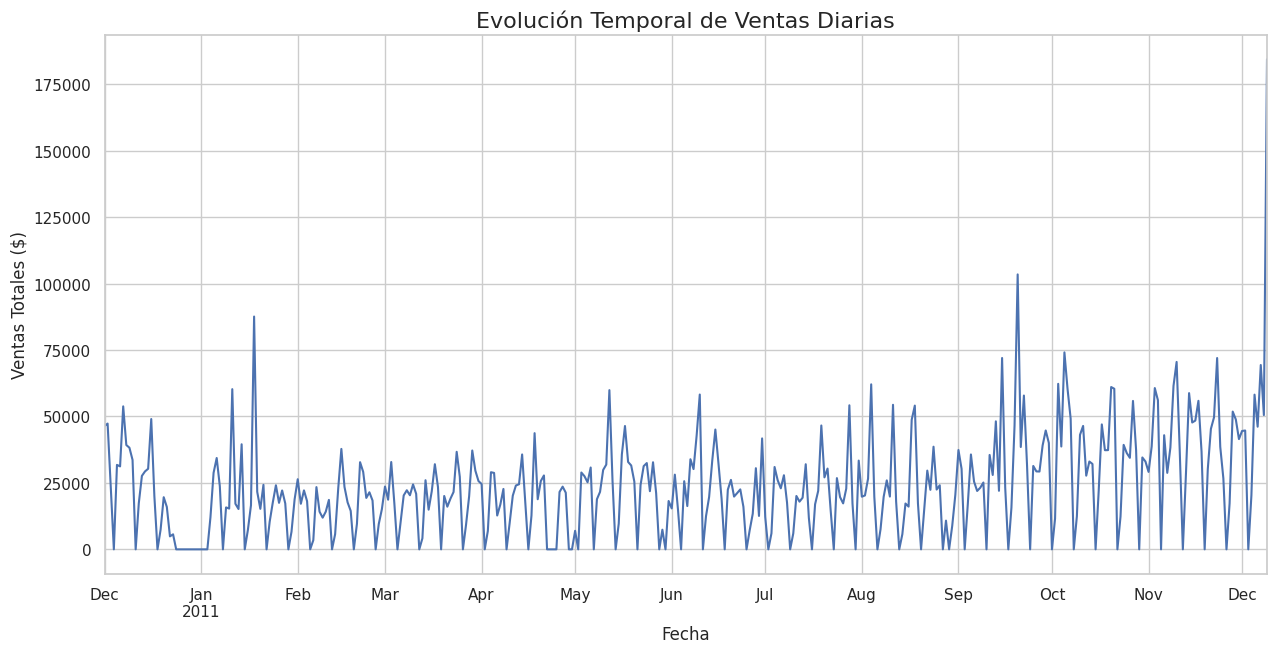

In [8]:

daily_sales = data.set_index('InvoiceDate').resample('D')['TotalPrice'].sum()
plt.figure(figsize=(15, 7))
daily_sales.plot()
plt.title('Evolución Temporal de Ventas Diarias', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Ventas Totales ($)', fontsize=12)
plt.grid(True)
plt.show()

## Ejercicio 6: Boxplot de UnitPrice por País

Crea un boxplot para visualizar la distribución de `UnitPrice` en función de `Country`.

Este gráfico ayudará a identificar la dispersión y posibles valores atípicos en los precios.

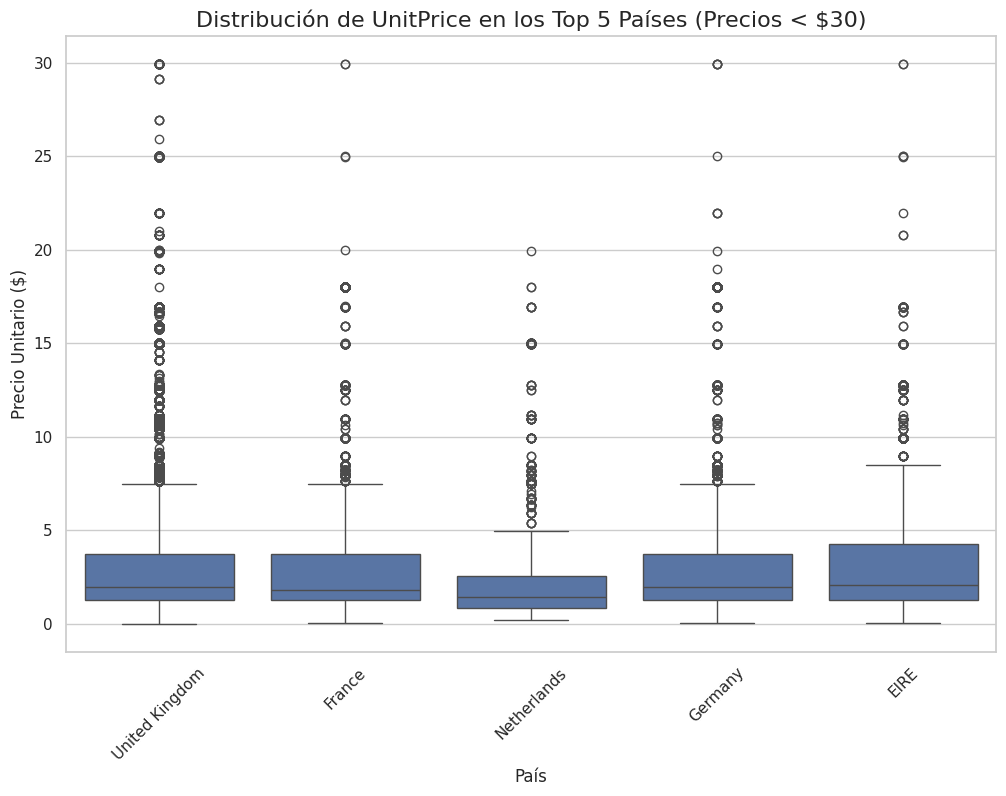

In [9]:

top_countries = country_analysis.head(5).index
data_top_countries = data[data['Country'].isin(top_countries)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='UnitPrice', data=data_top_countries[data_top_countries['UnitPrice'] < 30])
plt.title('Distribución de UnitPrice en los Top 5 Países (Precios < $30)', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Precio Unitario ($)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Ejercicio 7: Scatter Plot entre Quantity y UnitPrice

Realiza un scatter plot para analizar la relación entre `Quantity` y `UnitPrice`.

Observa si existe alguna tendencia o correlación entre la cantidad y el precio unitario.

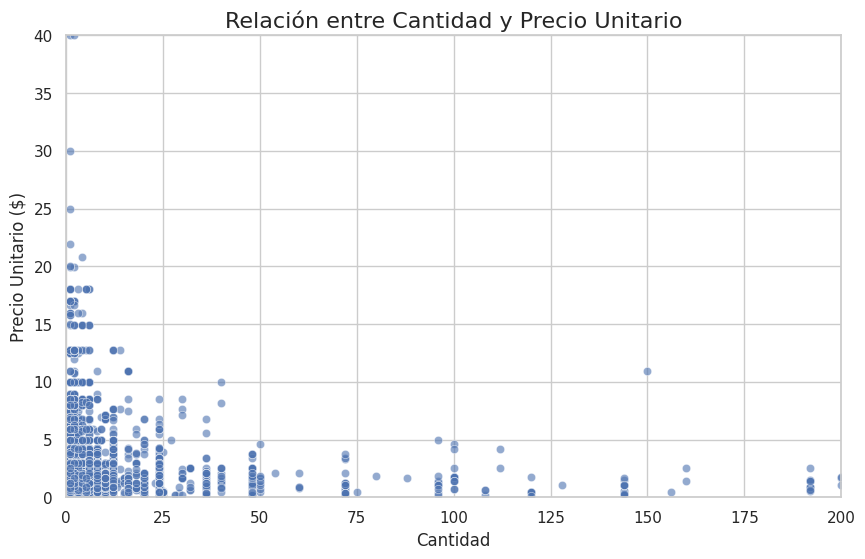

In [10]:

sample_data = data.sample(n=5000, random_state=42)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=sample_data, alpha=0.6)
plt.title('Relación entre Cantidad y Precio Unitario', fontsize=16)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Precio Unitario ($)', fontsize=12)
plt.xlim(0, 200)
plt.ylim(0, 40)
plt.show()

## Ejercicio 8: Distribución de Clientes por País

Utilizando la columna `Country`, crea un gráfico de pastel (pie chart) que muestre la proporción de registros por país. Elimine los que tengan muy poco porcentaje)

Este gráfico es útil para visualizar la distribución geográfica de las ventas.

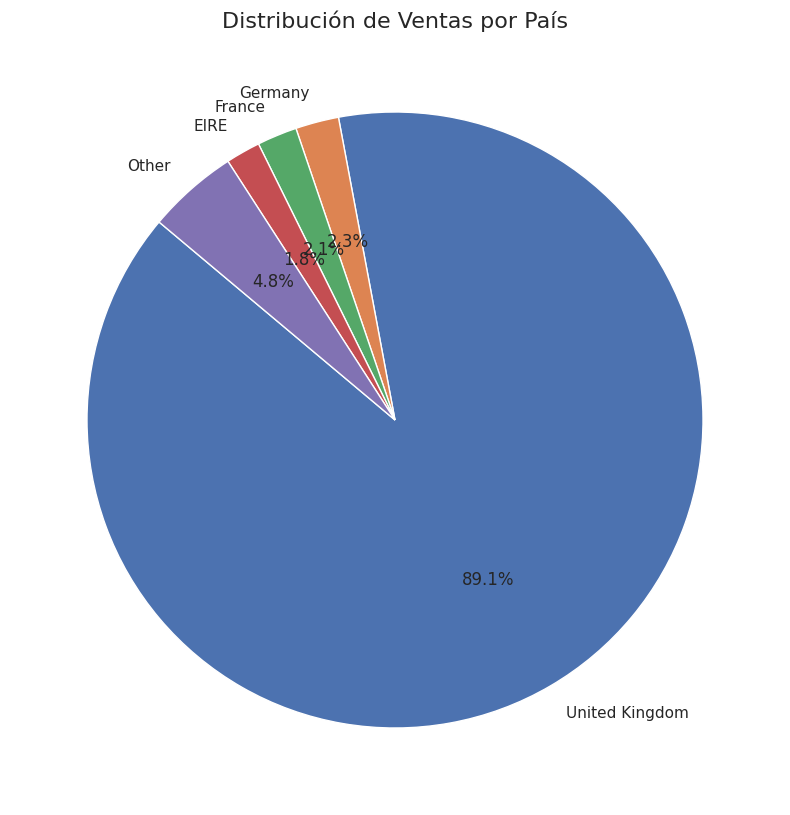

In [11]:

country_dist = data['Country'].value_counts()
threshold = len(data) * 0.01
main_countries = country_dist[country_dist >= threshold]
other_countries_sum = country_dist[country_dist < threshold].sum()
main_countries['Other'] = other_countries_sum
plt.figure(figsize=(10, 10))
plt.pie(main_countries, labels=main_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Ventas por País', fontsize=16)
plt.ylabel('')
plt.show()

## Ejercicio 9: Evolución del Precio Unitario Promedio

Agrupa los datos por la fecha (utilizando la columna `InvoiceDate`) para calcular el precio unitario promedio diario y visualízalo con un gráfico de líneas. (hagalo mensual )


Esta visualización permite observar tendencias en el precio a lo largo del tiempo.

/tmp/ipython-input-898261814.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_price = data.set_index('InvoiceDate').resample('M')['UnitPrice'].mean()


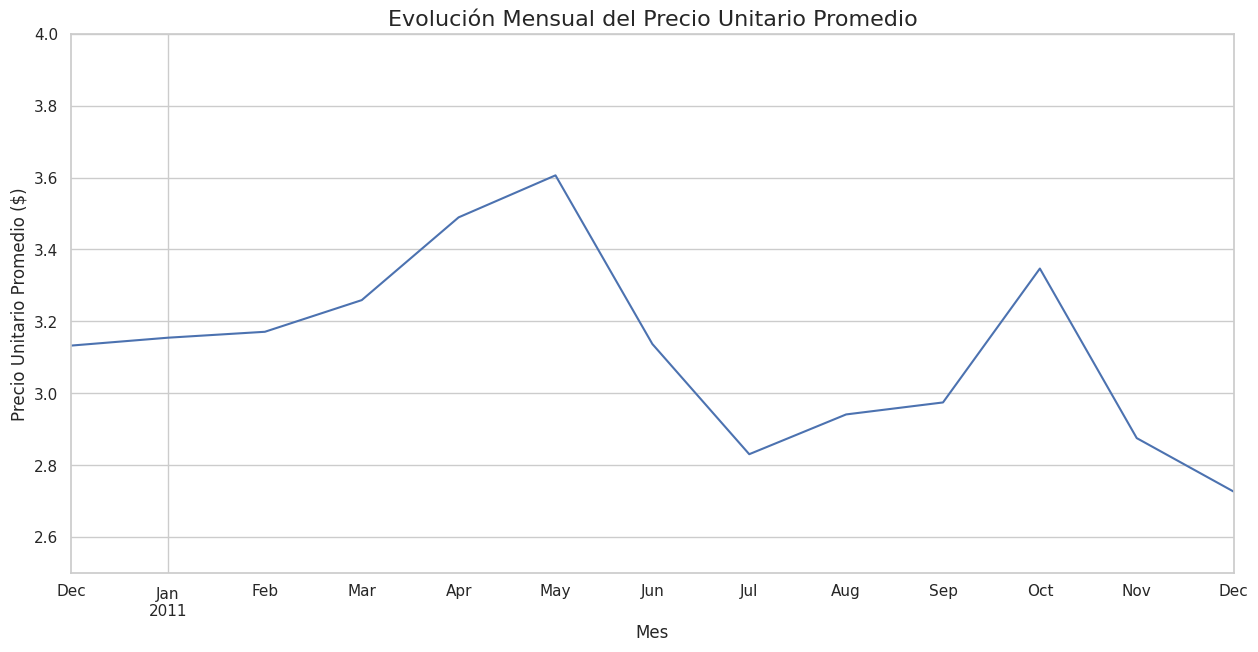

In [12]:

monthly_avg_price = data.set_index('InvoiceDate').resample('M')['UnitPrice'].mean()

plt.figure(figsize=(15, 7))
monthly_avg_price.plot()
plt.title('Evolución Mensual del Precio Unitario Promedio', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Precio Unitario Promedio ($)', fontsize=12)
plt.grid(True)
plt.ylim(2.5, 4.0)
plt.show()

## Ejercicio 10: Frecuencia de Productos por Descripción

Agrupa el dataset por la columna `Description` y cuenta la frecuencia de cada producto.

Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.

Top 5 Productos por Descripción:
Description
WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1723
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1396
Name: count, dtype: int64


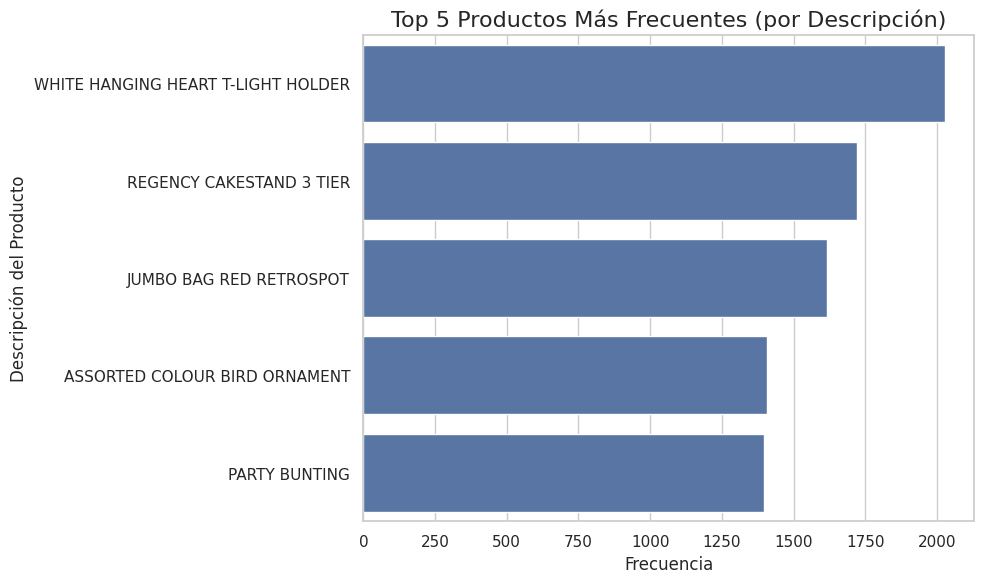

In [13]:

description_frequency = data['Description'].value_counts().head(5)

print("Top 5 Productos por Descripción:")
print(description_frequency)

plt.figure(figsize=(10, 6))
sns.barplot(y=description_frequency.index, x=description_frequency.values)
plt.title('Top 5 Productos Más Frecuentes (por Descripción)', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Descripción del Producto', fontsize=12)
plt.tight_layout()
plt.show()

## Conclusiones Generales

En este notebook se han propuesto 10 ejercicios que cubren desde la exploración básica del dataset hasta operaciones de agrupación y la generación de diferentes tipos de gráficos para responder a preguntas de análisis de ventas.

Recuerda comentar tu código y documentar tus hallazgos en celdas de markdown para que el proceso quede bien explicado.